In [2]:
#**************************************
# Name: Jonah Zembower
# Date: June 28, 2024
# Focusing in on positional differences
#**************************************

In [3]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing file paths
alec_griswold = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Heart_Rate_Research/Individual Heart Rate/Alec Griswold/Alec_Griswold_Spring_2024.csv')
anthony_panko = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Heart_Rate_Research/Individual Heart Rate/Anthony Panko/Anthony_Panko_Spring_2024.csv')
joe_spencer = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Heart_Rate_Research/Individual Heart Rate/Joe Spencer/Joe_Spencer_Spring_2024.csv')
lucas_balderrama = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Heart_Rate_Research/Individual Heart Rate/Lucas Balderrama/Lucas_Balderrama_Spring_2024.csv')

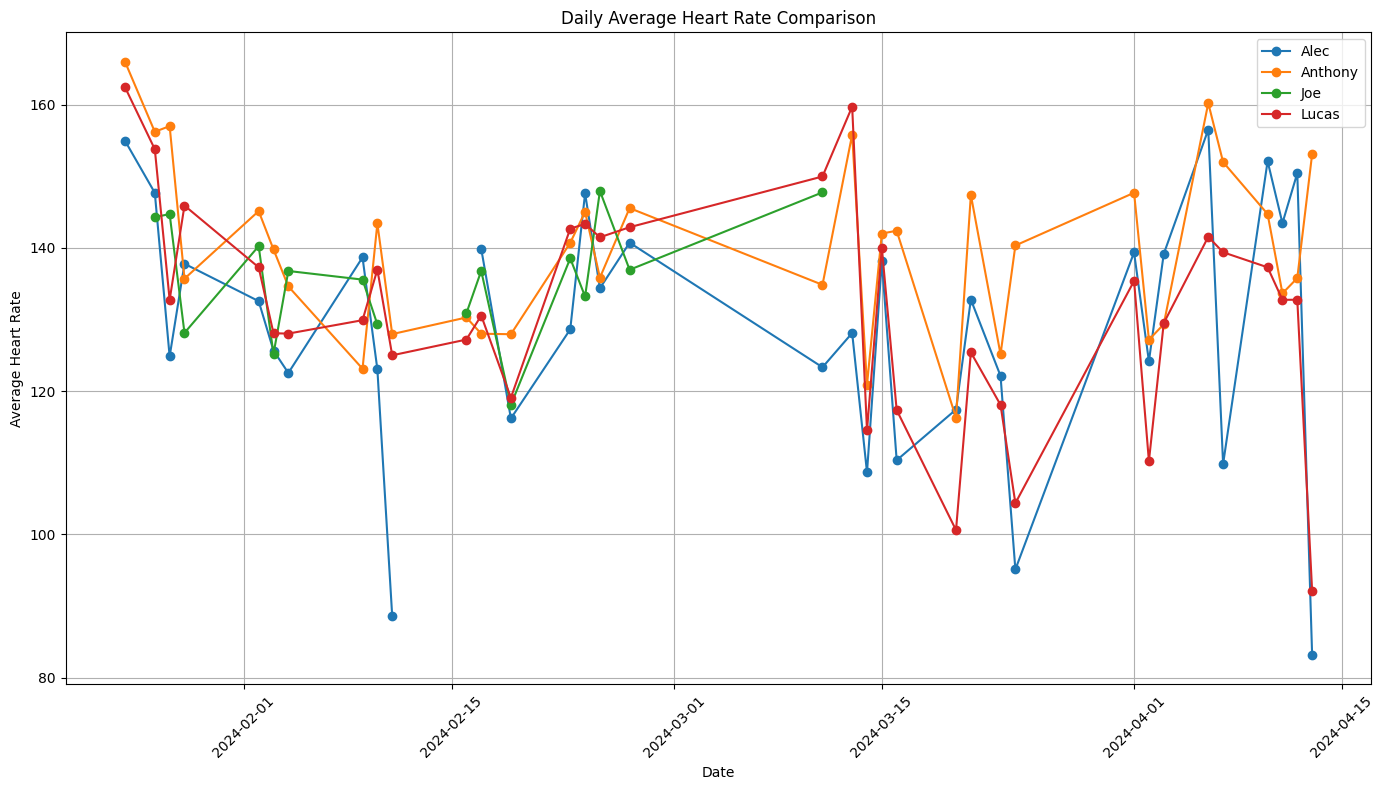

In [5]:

# Calculate the daily average heart rates for each person
alec_daily_avg = alec_griswold.mean(axis=0)
anthony_daily_avg = anthony_panko.mean(axis=0)
joe_daily_avg = joe_spencer.mean(axis=0)
lucas_daily_avg = lucas_balderrama.mean(axis=0)



# Convert the indices to datetime for plotting
alec_daily_avg.index = pd.to_datetime(alec_daily_avg.index)
anthony_daily_avg.index = pd.to_datetime(anthony_daily_avg.index)
joe_daily_avg.index = pd.to_datetime(joe_daily_avg.index)
lucas_daily_avg.index = pd.to_datetime(lucas_daily_avg.index)



# Create a DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'Alec': alec_daily_avg,
    'Anthony': anthony_daily_avg,
    'Joe': joe_daily_avg,
    'Lucas': lucas_daily_avg
})

# Plot the data
plt.figure(figsize=(14, 8))

for column in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df[column], label=column, marker='o')

plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.title('Daily Average Heart Rate Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

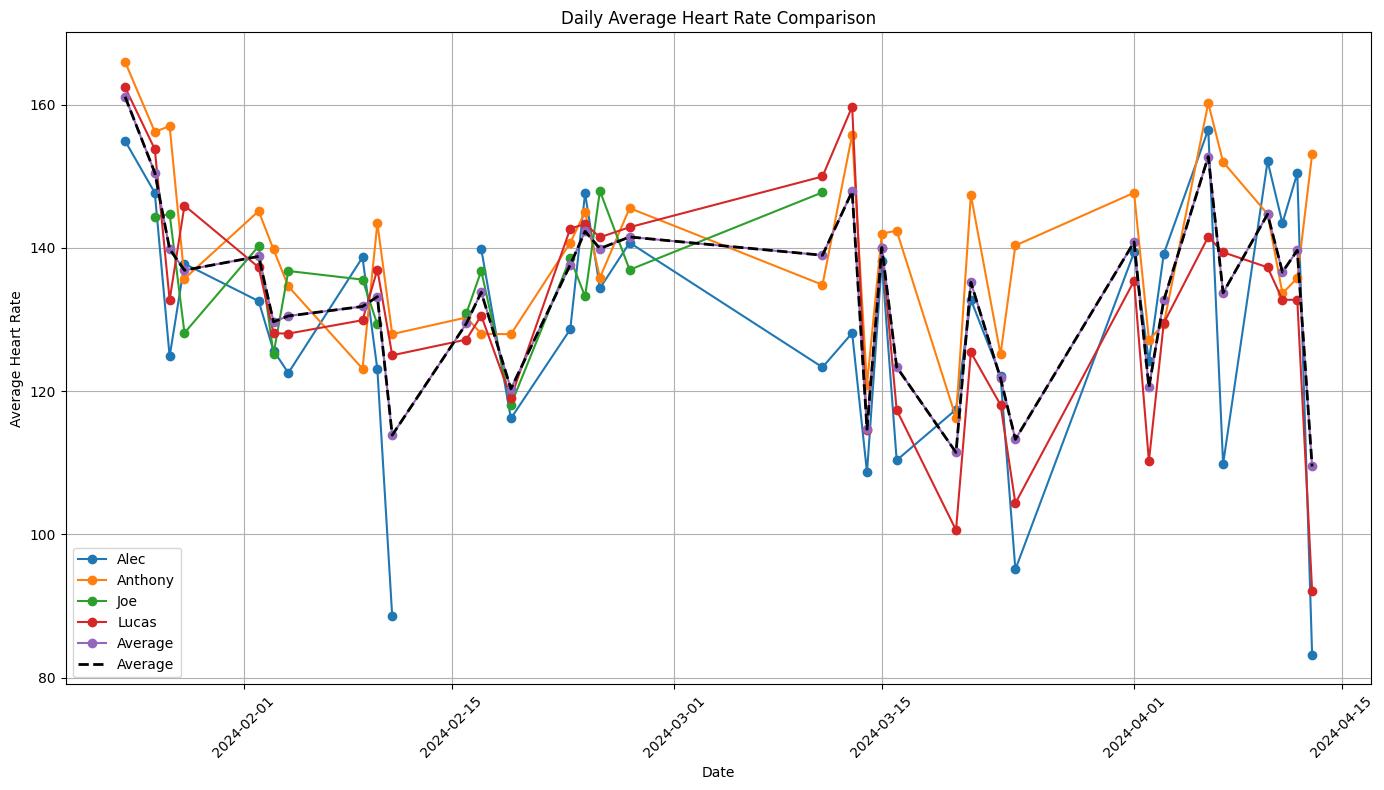

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the daily average heart rates for each person
alec_daily_avg = alec_griswold.mean(axis=0)
anthony_daily_avg = anthony_panko.mean(axis=0)
joe_daily_avg = joe_spencer.mean(axis=0)
lucas_daily_avg = lucas_balderrama.mean(axis=0)

# Convert the indices to datetime for plotting
alec_daily_avg.index = pd.to_datetime(alec_daily_avg.index)
anthony_daily_avg.index = pd.to_datetime(anthony_daily_avg.index)
joe_daily_avg.index = pd.to_datetime(joe_daily_avg.index)
lucas_daily_avg.index = pd.to_datetime(lucas_daily_avg.index)

# Create a DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'Alec': alec_daily_avg,
    'Anthony': anthony_daily_avg,
    'Joe': joe_daily_avg,
    'Lucas': lucas_daily_avg
})

# Calculate the overall average across all players
comparison_df['Average'] = comparison_df.mean(axis=1)

# Plot the data
plt.figure(figsize=(14, 8))

for column in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df[column], label=column, marker='o')

# Highlight the average line
plt.plot(comparison_df.index, comparison_df['Average'], label='Average', color='black', linestyle='--', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.title('Daily Average Heart Rate Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [23]:
# Compute and output the overall average heart rate across all sessions for each player
alec_overall_avg = alec_daily_avg.mean()
anthony_overall_avg = anthony_daily_avg.mean()
joe_overall_avg = joe_daily_avg.mean()
lucas_overall_avg = lucas_daily_avg.mean()

# Compute the overall average heart rate across all players
overall_avg_all_players = comparison_df['Average'].mean()

# Output the results
print(f"Overall average heart rate for Alec: {alec_overall_avg:.2f}")
print(f"Overall average heart rate for Anthony: {anthony_overall_avg:.2f}")
print(f"Overall average heart rate for Joe: {joe_overall_avg:.2f}")
print(f"Overall average heart rate for Lucas: {lucas_overall_avg:.2f}")
print(f"Overall average heart rate across all players: {overall_avg_all_players:.2f}")

Overall average heart rate for Alec: 128.77
Overall average heart rate for Anthony: 139.75
Overall average heart rate for Joe: 135.90
Overall average heart rate for Lucas: 131.67
Overall average heart rate across all players: 133.40


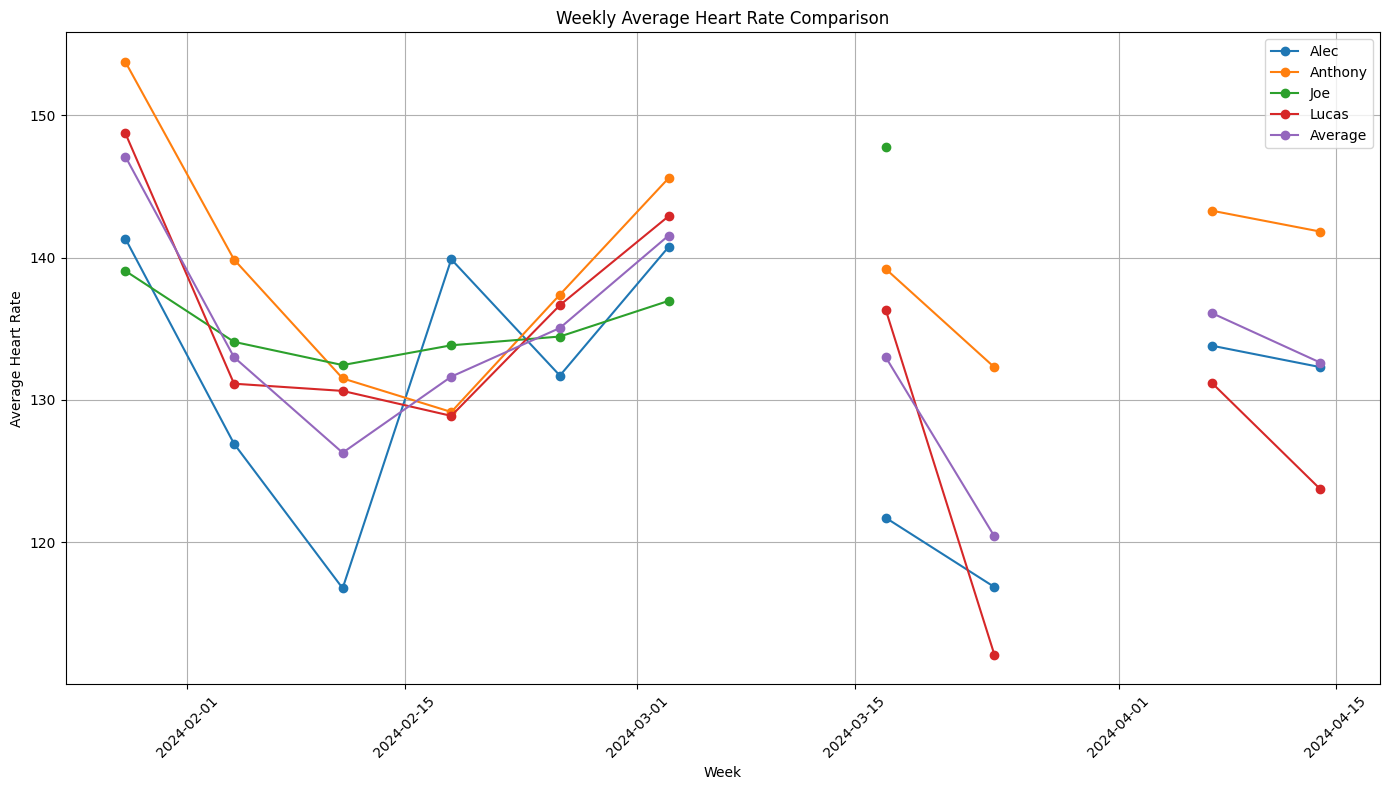

In [7]:
# Convert the index to datetime for resampling
comparison_df.index = pd.to_datetime(comparison_df.index)

# Resample the data by week and calculate the weekly average heart rate for each individual
weekly_avg_df = comparison_df.resample('W').mean()

# Plot the weekly average heart rates
plt.figure(figsize=(14, 8))

for column in weekly_avg_df.columns:
    plt.plot(weekly_avg_df.index, weekly_avg_df[column], label=column, marker='o')

plt.xlabel('Week')
plt.ylabel('Average Heart Rate')
plt.title('Weekly Average Heart Rate Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

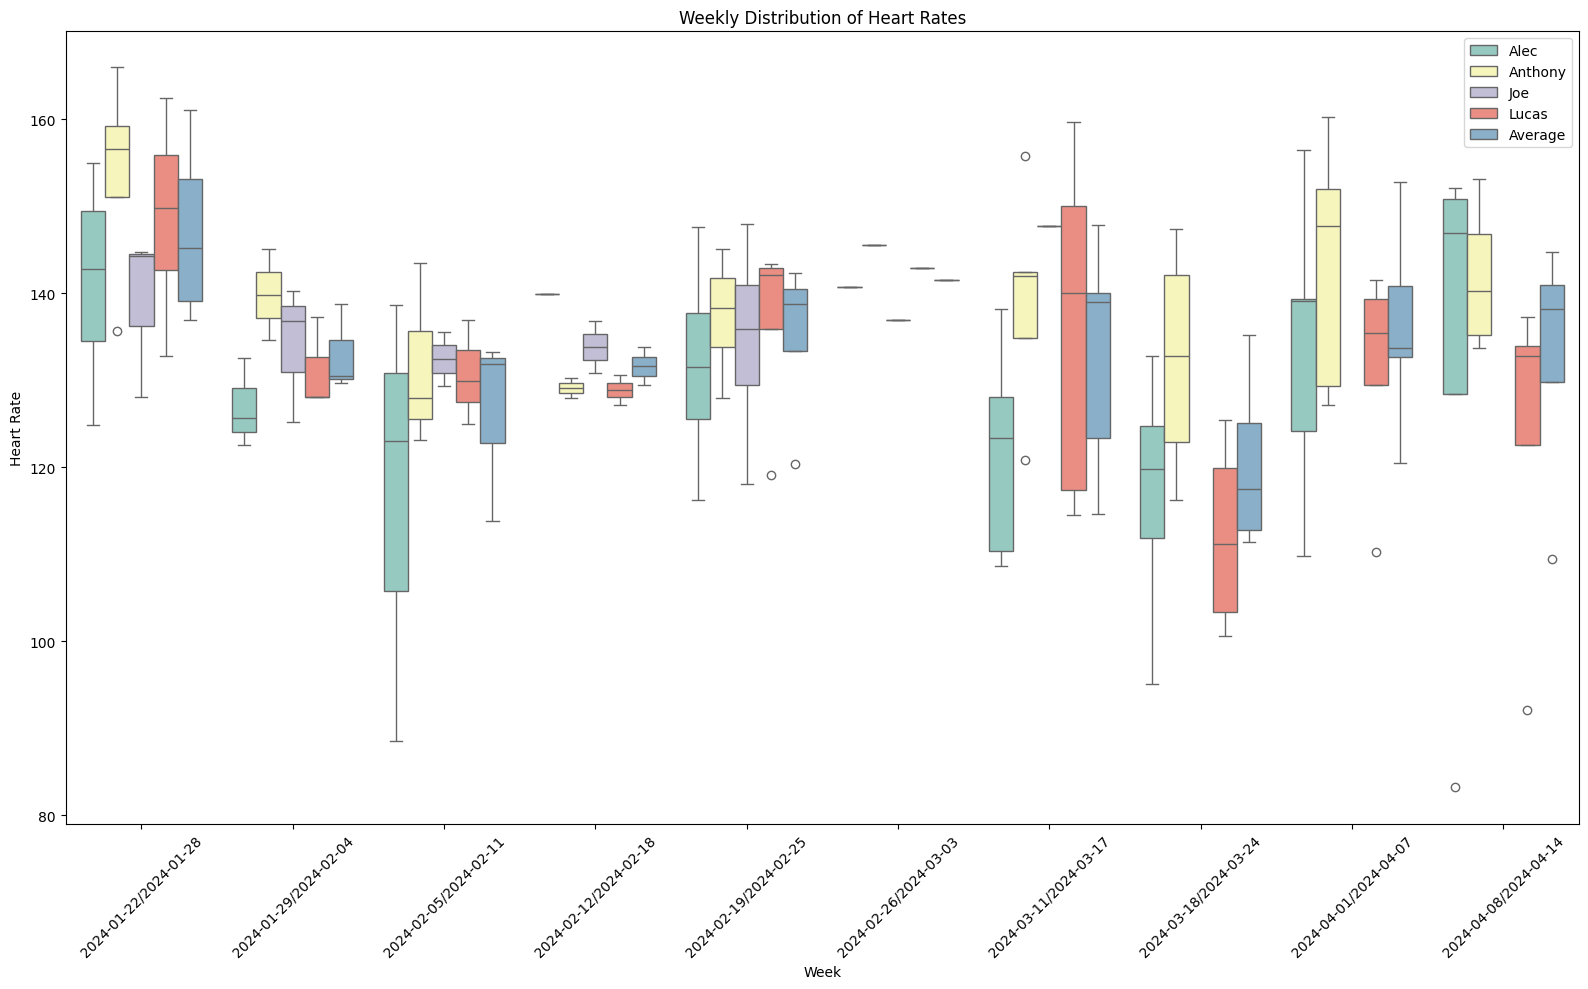

In [8]:
# Reset index to get dates in the DataFrame
comparison_df.reset_index(inplace=True)

# Convert DataFrame from wide to long format for easier plotting
long_df = comparison_df.melt(id_vars='index', var_name='Individual', value_name='Heart Rate')

# Add a column for week
long_df['Week'] = pd.to_datetime(long_df['index']).dt.to_period('W')

# Plot box plots
plt.figure(figsize=(16, 10))
sns.boxplot(x='Week', y='Heart Rate', hue='Individual', data=long_df, palette='Set3')
plt.title('Weekly Distribution of Heart Rates')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

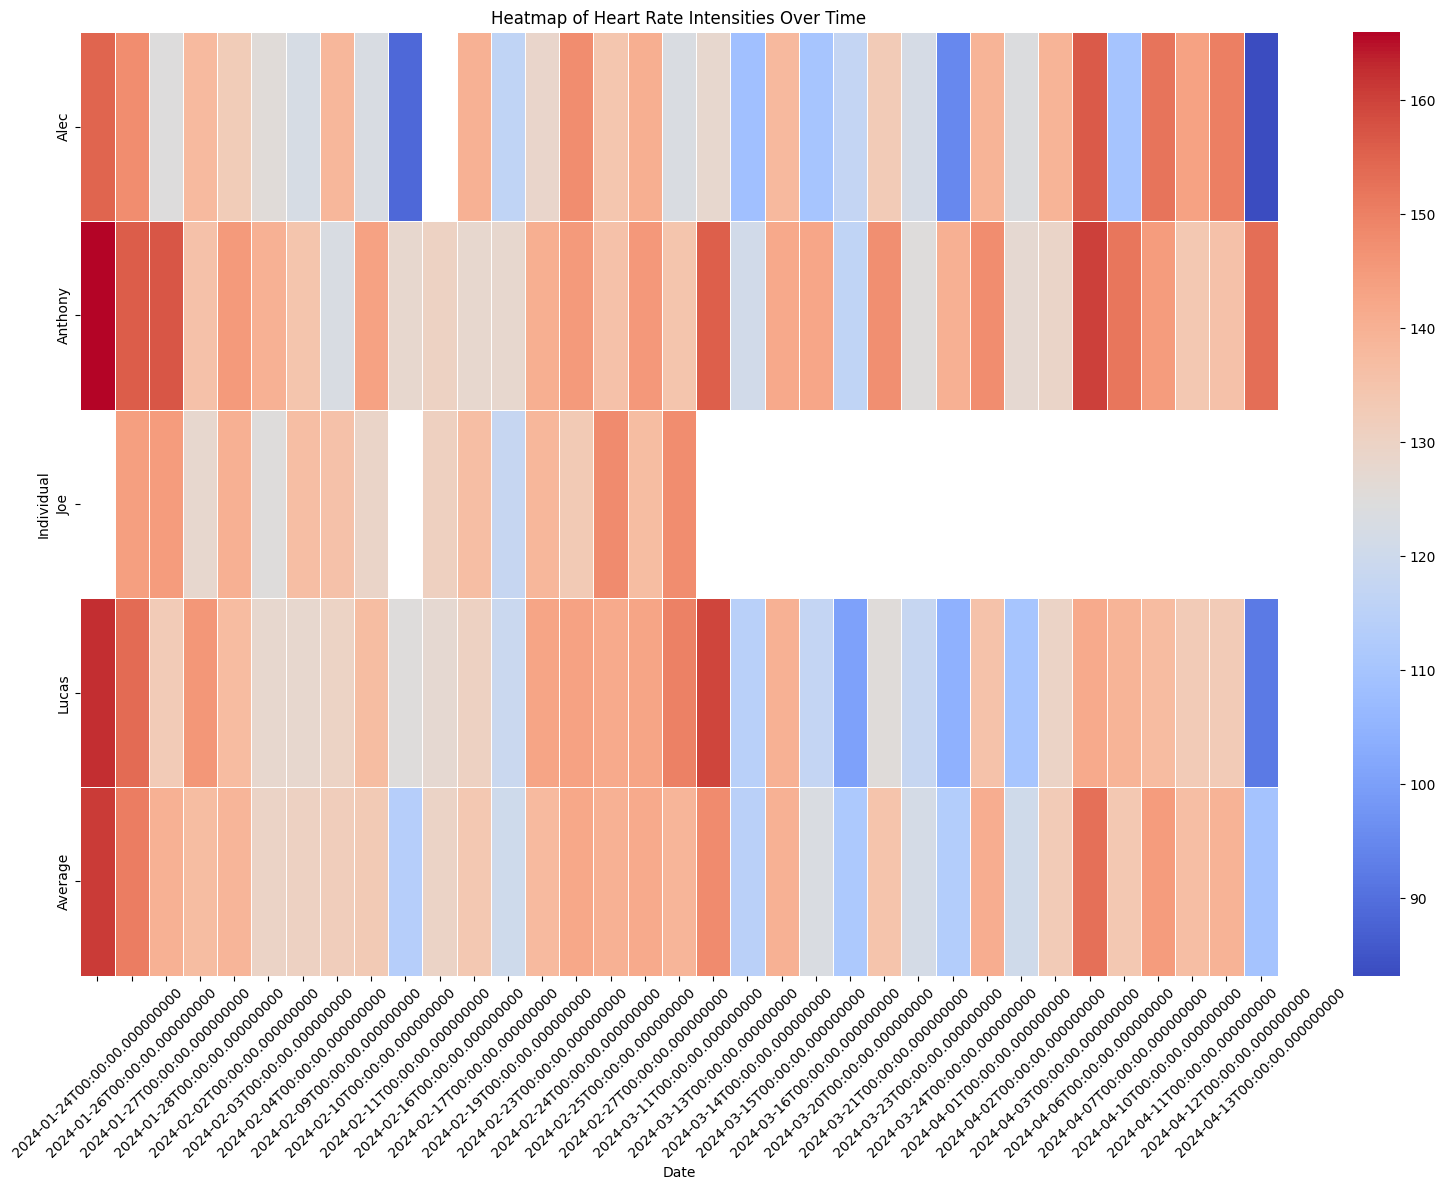

In [9]:
# Generate heatmaps to visualize the intensity of heart rates over time

# Set the index back to the original datetime index
comparison_df.set_index('index', inplace=True)

# Plot heatmaps
plt.figure(figsize=(16, 12))

sns.heatmap(comparison_df.T, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Heatmap of Heart Rate Intensities Over Time')
plt.xlabel('Date')
plt.ylabel('Individual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

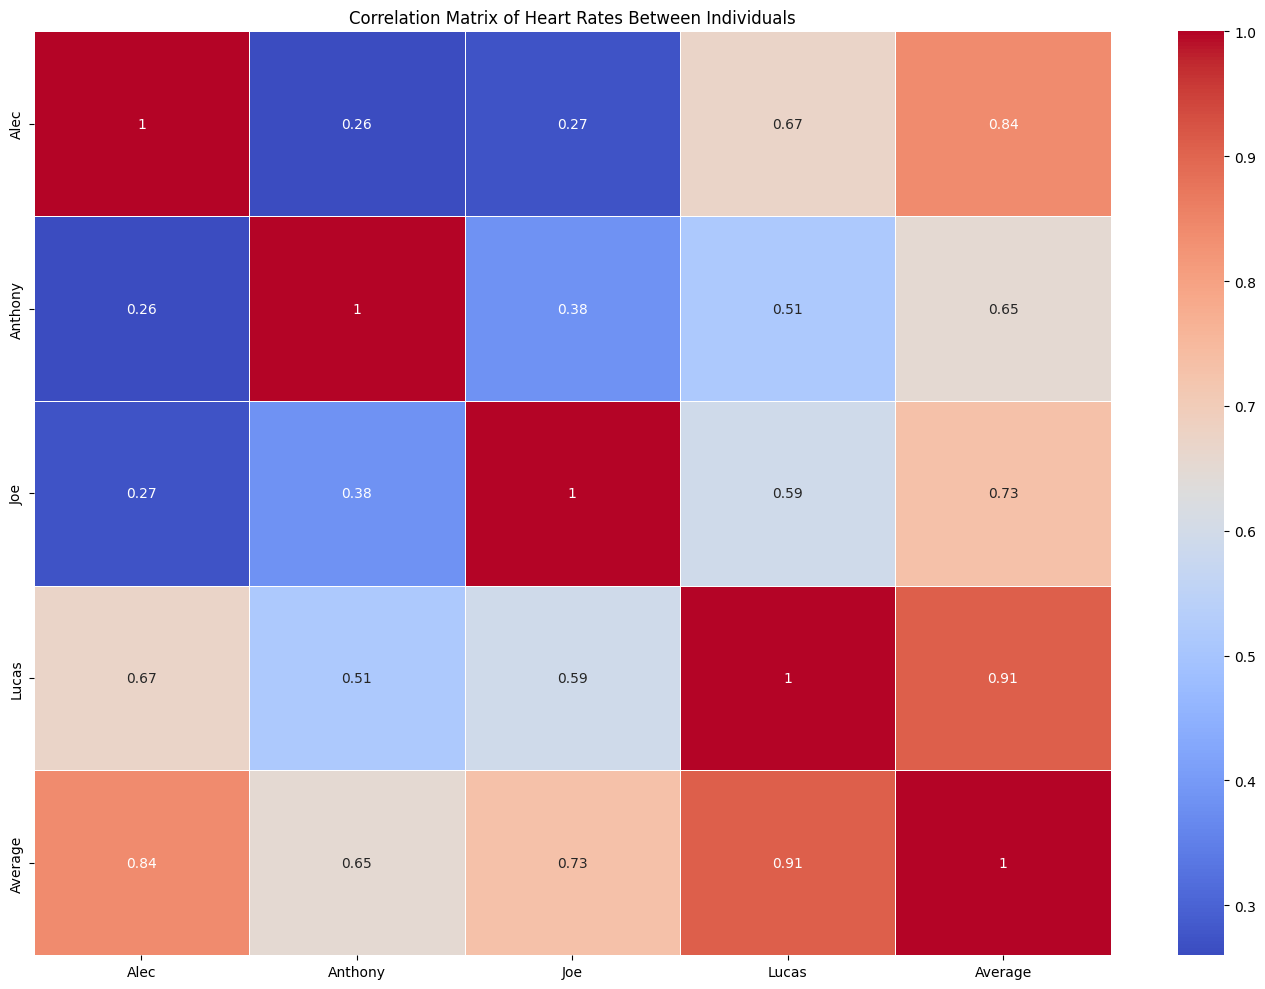

In [10]:
# Plot a correlation matrix to explore relationships between heart rates of different individuals
correlation_matrix = comparison_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Heart Rates Between Individuals')
plt.tight_layout()
plt.show()

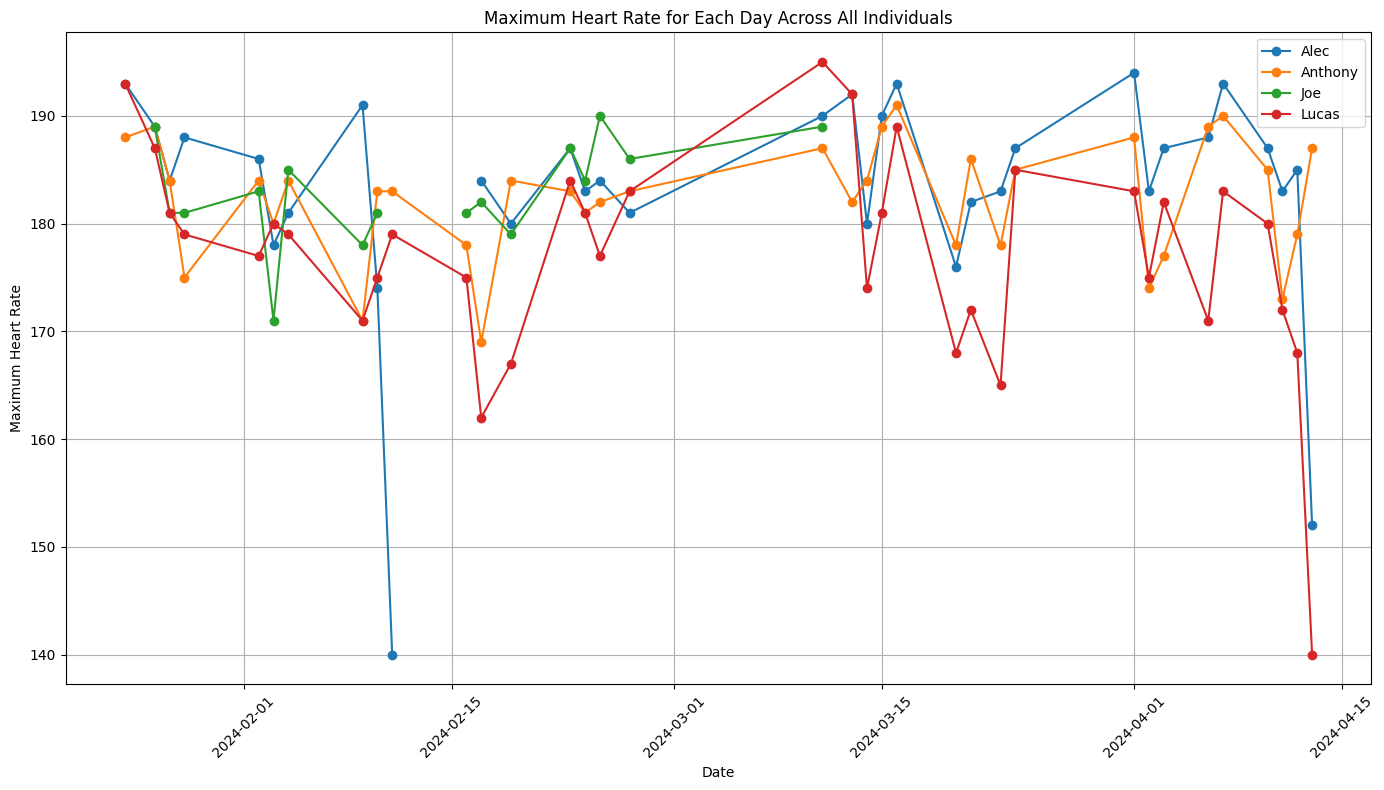

In [11]:
# Calculate the daily average heart rates for each person
alec_daily_max = alec_griswold.max(axis=0)
anthony_daily_max = anthony_panko.max(axis=0)
joe_daily_max = joe_spencer.max(axis=0)
lucas_daily_max = lucas_balderrama.max(axis=0)



# Convert the indices to datetime for plotting
alec_daily_max.index = pd.to_datetime(alec_daily_max.index)
anthony_daily_max.index = pd.to_datetime(anthony_daily_max.index)
joe_daily_max.index = pd.to_datetime(joe_daily_max.index)
lucas_daily_max.index = pd.to_datetime(lucas_daily_max.index)


# Create a DataFrame for easier comparison
comparison_df_max = pd.DataFrame({
    'Alec': alec_daily_max,
    'Anthony': anthony_daily_max,
    'Joe': joe_daily_max,
    'Lucas': lucas_daily_max
})
# Plot the maximum heart rate for each day
plt.figure(figsize=(14, 8))
for column in comparison_df_max.columns:
    plt.plot(comparison_df_max.index, comparison_df_max[column], label=column, marker='o')

plt.xlabel('Date')
plt.ylabel('Maximum Heart Rate')
plt.title('Maximum Heart Rate for Each Day Across All Individuals')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Now I want to look at the moments leading up to a game and how players are reacting in their heart rate.

We had games on:
- March 16 Game against Missisauga
- March 24 Game against Lancaster F.C.
- April 7 Game against Wheeling University
- April 13 Tournament against Juniata, Mount Aloysius, then St. Vincent

In [12]:
# selecting the days of games to look at in analysis in relation to position
game_dates = ["2024-03-16", "2024-03-24", "2024-04-07", "2024-04-13"]

alec_game_data = alec_griswold[game_dates]
anthony_game_data = anthony_panko[game_dates]
lucas_game_data = lucas_balderrama[game_dates]


- Mississauga Game:
  - Warm-Up started at 0 
  - Half 1 started at 1,305 
  - Halftime started at 2,805
  - Half 2 started at 3,180

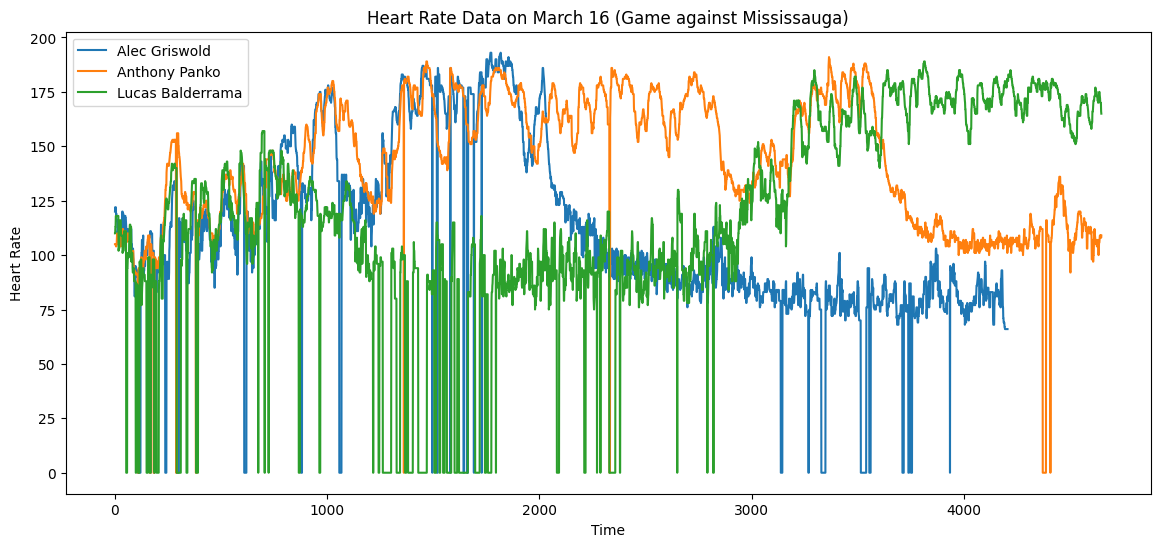

In [13]:
# Plot for March 16
plt.figure(figsize=(14, 6))
plt.plot(alec_game_data["2024-03-16"], label='Alec Griswold')
plt.plot(anthony_game_data["2024-03-16"], label='Anthony Panko')
plt.plot(lucas_game_data["2024-03-16"], label='Lucas Balderrama')

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data on March 16 (Game against Mississauga)')
plt.legend()
plt.show()


- Lancaster F.C. Game:
  - Warm-up started at 0
  - Half 1 started at 1,635
  - Halftime started at 3,000
  - Half 2 started at 3,360
  - Halftime started at 4,500
  - Half 3 started at 5,040

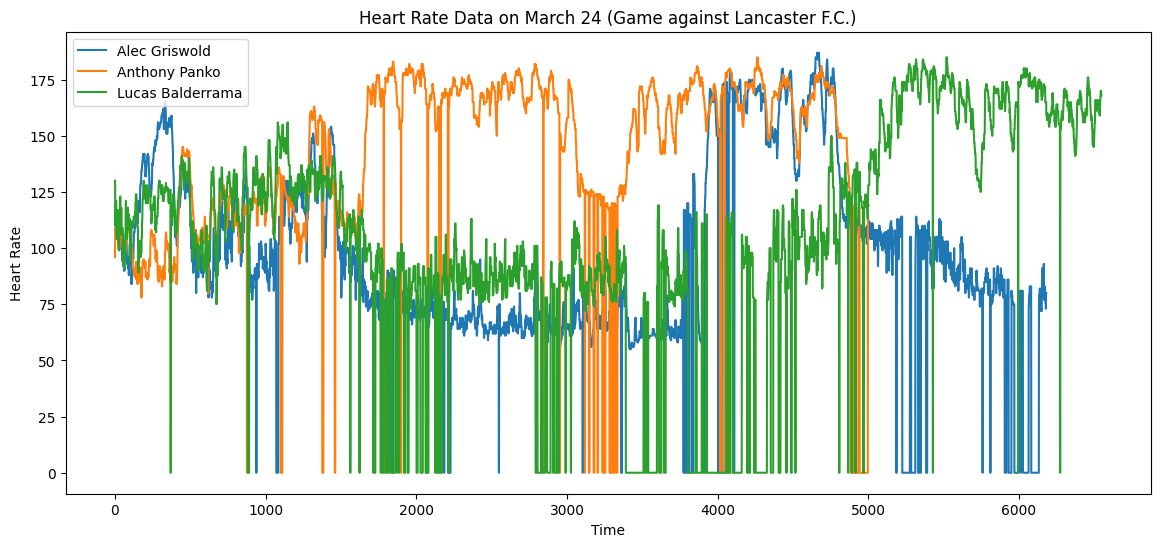

In [14]:
# Plot for March 24
plt.figure(figsize=(14, 6))
plt.plot(alec_game_data["2024-03-24"], label='Alec Griswold')
plt.plot(anthony_game_data["2024-03-24"], label='Anthony Panko')
plt.plot(lucas_game_data["2024-03-24"], label='Lucas Balderrama')

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data on March 24 (Game against Lancaster F.C.)')
plt.legend()
plt.show()


- Wheeling University Game:
  - Warm-up started at 0
  - Half 1 started at 645
  - Half 2 started at 2,100

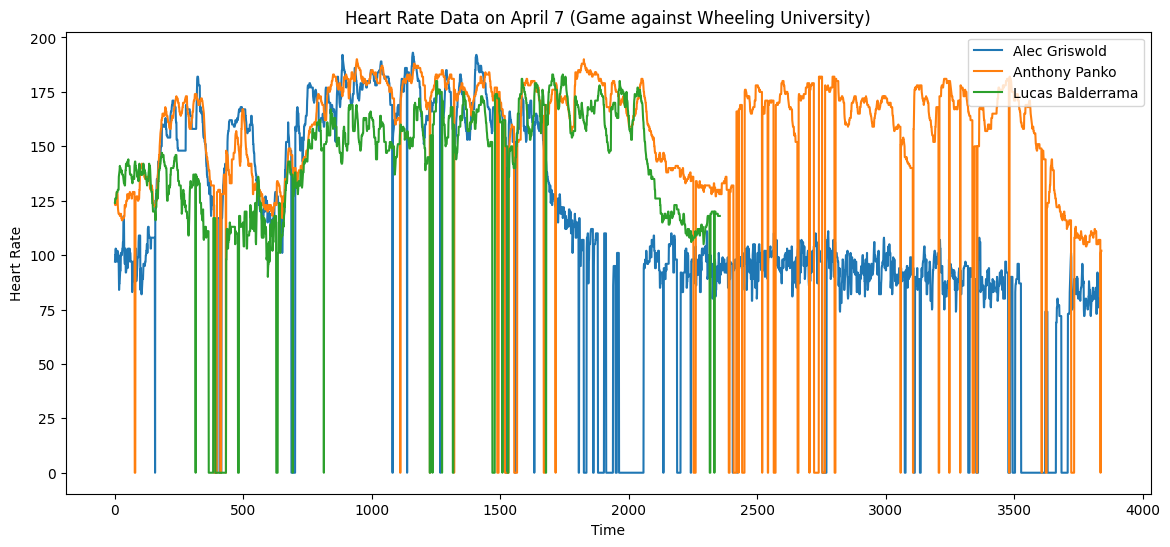

In [15]:
# Plot for April 7
plt.figure(figsize=(14, 6))
plt.plot(alec_game_data["2024-04-07"], label='Alec Griswold')
plt.plot(anthony_game_data["2024-04-07"], label='Anthony Panko')
plt.plot(lucas_game_data["2024-04-07"], label='Lucas Balderrama')

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data on April 7 (Game against Wheeling University)')
plt.legend()
plt.show()


- Juniata Game:
  - Warm-up Juniata 0
  - Half 1 Juniata 690
  - Half 2 Juniata 1,740

The other games can be found through polar. It was hard to get them separate for analysis.

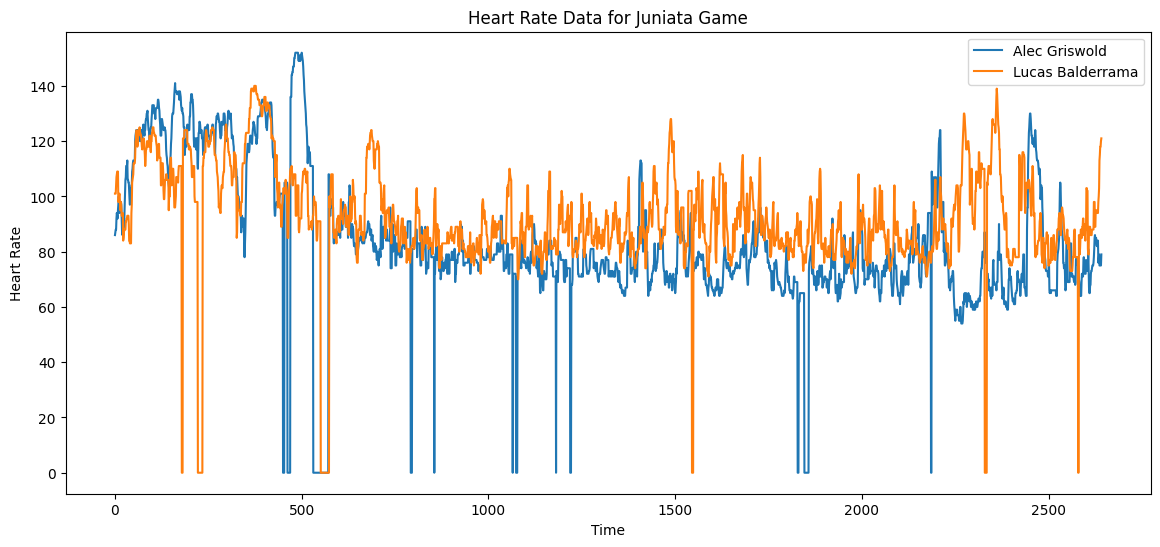

In [16]:
# Plot for Juniata
plt.figure(figsize=(14, 6))
plt.plot(alec_game_data["2024-04-13"], label='Alec Griswold')
plt.plot(lucas_game_data["2024-04-13"], label='Lucas Balderrama')


plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data for Juniata Game')
plt.legend()
plt.show()


Both players didn't play in the juniata game.

In [17]:
mount_aloysius_alec = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Individual Data/Center Backs/Alec Griswold/Alec_Griswold_2024-04-13_16-35-57.CSV'
mount_aloysius_lucas = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Individual Data/Center Backs/Lucas Balderrama/Lucas+_Balderrama_2024-04-13_16-35-57.CSV'
mount_aloysius_panko = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Individual Data/Center Backs/Anthony Panko/Anthony+_Panko_2024-04-13_16-35-57.CSV'

In [18]:
# Reload the data from the correct rows and rename columns for proper access
df1 = pd.read_csv(mount_aloysius_alec, skiprows=2)
df2 = pd.read_csv(mount_aloysius_lucas, skiprows=2)
df3 = pd.read_csv(mount_aloysius_panko, skiprows=2)

# Renaming columns to remove leading/trailing spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()

# Inspect the columns and initial few rows to verify correctness
df1.head(), df1.columns
df2.head(), df2.columns
df3.head(), df3.columns

(   Sample rate      Time  HR (bpm)  Speed (mi/h)  Pace (min/mi)  Cadence  \
 0          2.0  00:00:00       130           NaN            NaN      NaN   
 1          NaN  00:00:02       132           NaN            NaN      NaN   
 2          NaN  00:00:04       132           NaN            NaN      NaN   
 3          NaN  00:00:06       132           NaN            NaN      NaN   
 4          NaN  00:00:08       132           NaN            NaN      NaN   
 
    Altitude (ft)  Stride length (in)  Distances (ft)  Temperatures (F)  \
 0            NaN                 NaN             NaN               NaN   
 1            NaN                 NaN             NaN               NaN   
 2            NaN                 NaN             NaN               NaN   
 3            NaN                 NaN             NaN               NaN   
 4            NaN                 NaN             NaN               NaN   
 
    Power (W)  Unnamed: 11  
 0        NaN          NaN  
 1        NaN          NaN

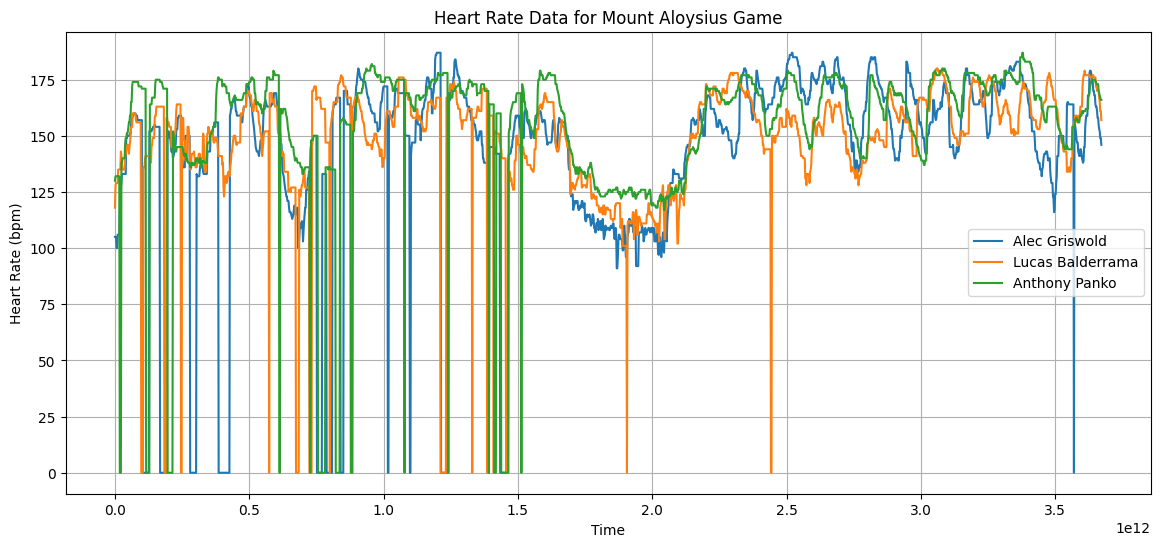

In [19]:
# Function to plot multiple time series dataframes on the same graph
def plot_multiple_time_series(dfs, titles):
    plt.figure(figsize=(14, 6))
    
    for df, title in zip(dfs, titles):
        time = pd.to_timedelta(df['Time'])
        hr = pd.to_numeric(df['HR (bpm)'], errors='coerce')
        
        plt.plot(time, hr, label=title)
    
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title("Heart Rate Data for Mount Aloysius Game")
    plt.legend()
    plt.grid(True)
    plt.show()
# Example usage
dfs = [df1, df2, df3]
titles = [
    "Alec Griswold",
    "Lucas Balderrama",
    "Anthony Panko"
]
plot_multiple_time_series(dfs, titles)


In [20]:
saint_vincent_lucas = "/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Individual Data/Center Backs/Lucas Balderrama/Lucas+_Balderrama_2024-04-13_17-44-45.CSV"
saint_vincent_panko = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Individual Data/Center Backs/Anthony Panko/Anthony+_Panko_2024-04-13_17-44-45.CSV'

In [21]:
# Reload the data from the correct rows and rename columns for proper access
df2 = pd.read_csv(mount_aloysius_lucas, skiprows=2)
df3 = pd.read_csv(mount_aloysius_panko, skiprows=2)

# Renaming columns to remove leading/trailing spaces
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()

# Inspect the columns and initial few rows to verify correctness
df2.head(), df2.columns
df3.head(), df3.columns

(   Sample rate      Time  HR (bpm)  Speed (mi/h)  Pace (min/mi)  Cadence  \
 0          2.0  00:00:00       130           NaN            NaN      NaN   
 1          NaN  00:00:02       132           NaN            NaN      NaN   
 2          NaN  00:00:04       132           NaN            NaN      NaN   
 3          NaN  00:00:06       132           NaN            NaN      NaN   
 4          NaN  00:00:08       132           NaN            NaN      NaN   
 
    Altitude (ft)  Stride length (in)  Distances (ft)  Temperatures (F)  \
 0            NaN                 NaN             NaN               NaN   
 1            NaN                 NaN             NaN               NaN   
 2            NaN                 NaN             NaN               NaN   
 3            NaN                 NaN             NaN               NaN   
 4            NaN                 NaN             NaN               NaN   
 
    Power (W)  Unnamed: 11  
 0        NaN          NaN  
 1        NaN          NaN

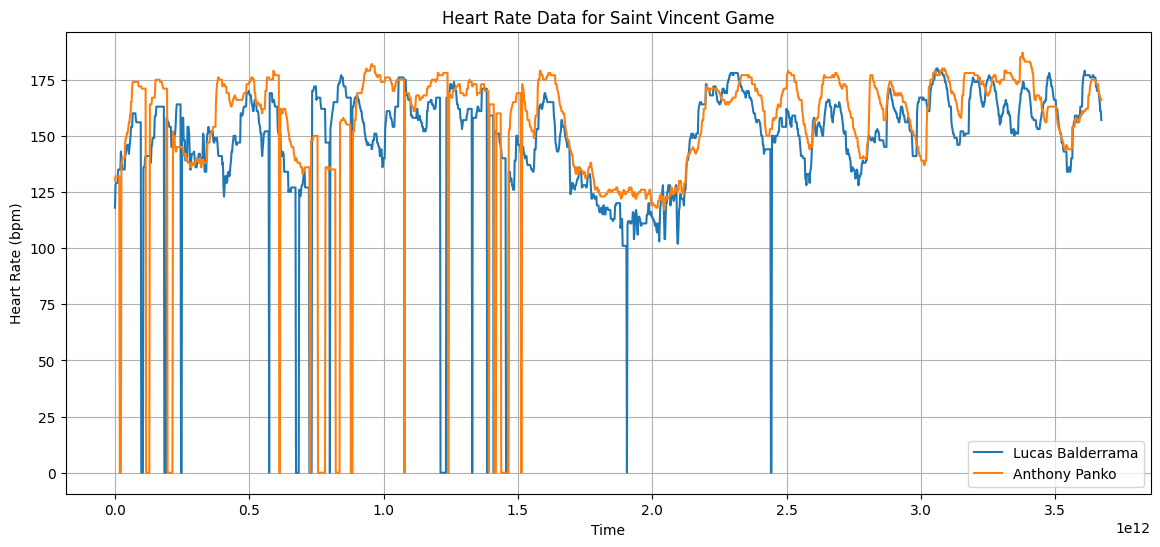

In [22]:
# Function to plot multiple time series dataframes on the same graph
def plot_multiple_time_series(dfs, titles):
    plt.figure(figsize=(14, 6))
    
    for df, title in zip(dfs, titles):
        time = pd.to_timedelta(df['Time'])
        hr = pd.to_numeric(df['HR (bpm)'], errors='coerce')
        
        plt.plot(time, hr, label=title)
    
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title("Heart Rate Data for Saint Vincent Game")
    plt.legend()
    plt.grid(True)
    plt.show()
# Example usage
dfs = [df2, df3]
titles = [
    "Lucas Balderrama",
    "Anthony Panko"
]
plot_multiple_time_series(dfs, titles)